# Stock Prices Prediction Using Keras Long Term Short Memory

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
data_train = pd.read_csv('NSE-TATAGLOBAL.csv')
train_set = data_train.iloc[:, 1:2].values

In [4]:
data_train.info


<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\vinay\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [11]:
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)



Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - loss: 0.0280
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0029
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0033
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0032
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - loss: 0.0027
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0023
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0021
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - loss: 0.0021
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - loss: 0.0022
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0024
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 0.0016
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0018
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.0019
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0014
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/s

In [12]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


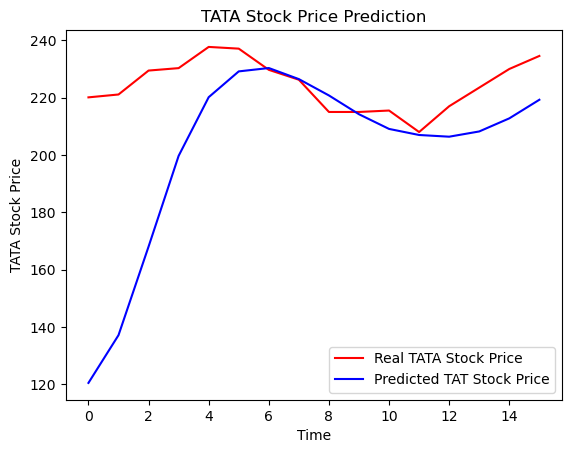

In [14]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()